<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/Advanced-Machine-Learning/blob/main/2348506_LabProgram4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Program_4_Dataset.csv')
df

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00
...,...,...,...,...,...,...
2873,118,1456768752,16.7,1015.1,81.9,2016-03-01 01:59:12+08:00
2874,119,1456768823,16.7,1015.1,82.0,2016-03-01 02:00:23+08:00
2875,120,1456768873,16.7,1015.1,81.9,2016-03-01 02:01:13+08:00
2876,121,1456768932,16.7,1015.1,81.7,2016-03-01 02:02:12+08:00


In [11]:
df.head(8)

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00
5,5,1456761973,17.6,1015.3,76.9,2016-03-01 00:06:13+08:00
6,6,1456762032,17.5,1015.2,77.0,2016-03-01 00:07:12+08:00
7,7,1456762092,17.5,1015.3,77.1,2016-03-01 00:08:12+08:00


In [12]:
#dropping all columns not required for analysis

In [13]:
df=df.drop(columns=df[["OS_Time_Stamp","index","TimeStamp"]])

In [14]:
df.isnull().sum()

Temperature    0
Pressure       0
Humidity       0
dtype: int64

In [15]:
#there is no null values

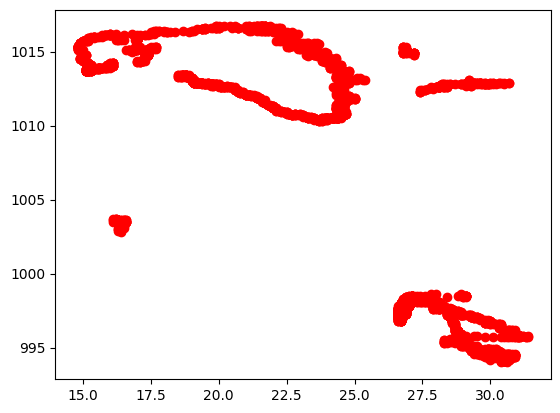

In [18]:
#visualize temp and pressure
plt.scatter(df['Temperature'], df['Pressure'], c='red')
plt.show()

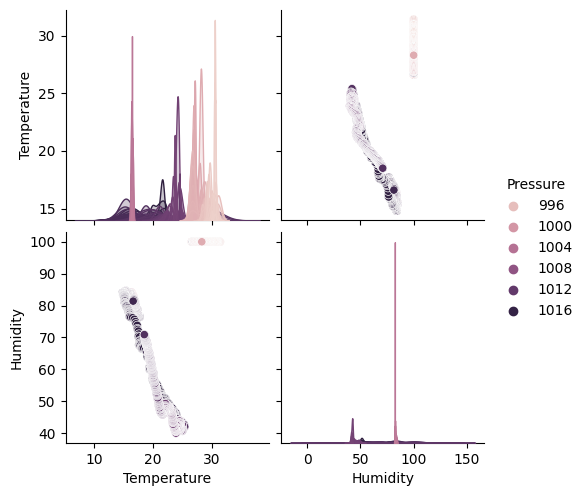

In [22]:
#Relationship of different target variable with highlight showing pressure
sns.pairplot(df, hue='Pressure',)
plt.show()

In [23]:
#predictor(x) and target(y)
X = df[['Temperature']]
y = df['Pressure']

In [24]:
#making empty list to store all the scores in loop
r2_scores = []
mse_scores = []
mae_scores = []

In [25]:
#Below variables are -1 so as to compare and get the best model
best_r2 = -1
best_degree = -1
best_train_size = -1
best_test_size = -1

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [29]:
# Using a for loop we are easily able to calculate target using all necessary conditions asked in the exercise.
# A loop helps saves time performing each condition and change one by one.

In [30]:
splits = [(0.66, 0.34), (0.7, 0.3), (0.8, 0.2)]
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)
    degrees = [2,4,6,7,8]
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly_train = poly_features.fit_transform(X_train)
        X_poly_test = poly_features.transform(X_test)
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mse)
        mae_scores.append(mae)
        print(f"Deg: {degree}, Test Size: {test_size}")
        print(f"R^2: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")
        print("~" * 40)

Deg: 2, Test Size: 0.34
R^2: 0.6267, MSE: 26.3822, MAE: 3.6887
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 4, Test Size: 0.34
R^2: 0.6828, MSE: 22.4142, MAE: 3.2353
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 6, Test Size: 0.34
R^2: 0.7078, MSE: 20.6478, MAE: 3.1304
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 7, Test Size: 0.34
R^2: 0.7148, MSE: 20.1528, MAE: 3.1103
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 8, Test Size: 0.34
R^2: 0.7132, MSE: 20.2654, MAE: 3.0972
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 2, Test Size: 0.3
R^2: 0.6453, MSE: 25.1449, MAE: 3.6223
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 4, Test Size: 0.3
R^2: 0.6942, MSE: 21.6793, MAE: 3.1853
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 6, Test Size: 0.3
R^2: 0.7175, MSE: 20.0236, MAE: 3.0850
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 7, Test Size: 0.3
R^2: 0.7214, MSE: 19.7483, MAE: 3.0735
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deg: 8, Test Size: 0.3
R^2: 0.7205, MSE: 19.8105, MAE: 3.0547
~~~~~~

In [32]:
#Using another for loop we can get the best model
if r2 > best_r2:
            best_r2 = r2
            best_degree = degree
            best_train_size = train_size
            best_test_size = test_size
print("Best Model:")
print(f"Degree: {best_degree}, Train Size: {best_train_size}, Test Size: {best_test_size}")
print(f"R^2: {best_r2:.4f}")

Best Model:
Degree: 8, Train Size: 0.8, Test Size: 0.2
R^2: 0.7023


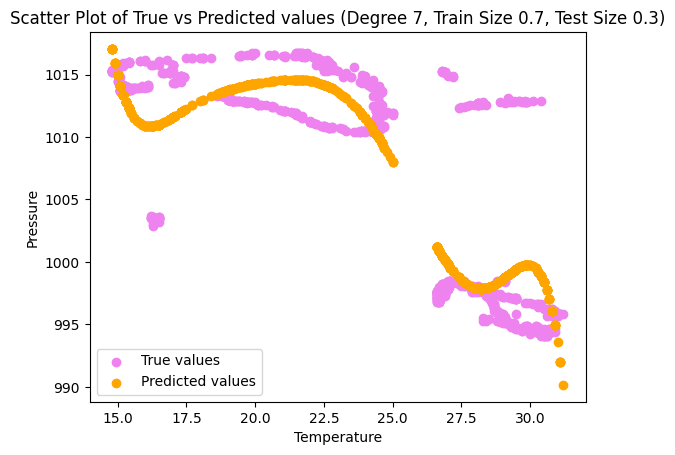

In [35]:
#info taken from the above best model
best_degree = 7
best_train_size = 0.7
best_test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=best_train_size, test_size=best_test_size, random_state=42)
poly_features = PolynomialFeatures(degree=best_degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
model = LinearRegression()
model.fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)
plt.scatter(X_test, y_test, color='violet', label='True values')
plt.scatter(X_test, y_pred, color='orange', label='Predicted values')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title(f'Scatter Plot of True vs Predicted values (Degree {best_degree}, Train Size {best_train_size}, Test Size {best_test_size})')
plt.legend()
plt.show()